In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns
%matplotlib inline

C:\Users\Ronak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [44]:
"""
In this project, I will be doing an explaratory analysis into the WHO Covid-19 global dataset as well as the global 
vaccine dataset. I aim to apply knowledge in pandas for data exploration and matplotlib/seaborn for visualization of this 
data. 
"""

'\nIn this project, I will be doing an explaratory analysis into the WHO Covid-19 global dataset as well as the global \nvaccine dataset. I aim to apply knowledge in pandas for data exploration and matplotlib/seaborn for visualization of this \ndata. \n'

In [2]:
#reading in csv database from WHO - database comes with 8 columns describing how many new and cumulative cases and deaths
# depending on which country and WHO region. This data has been updated everyday until 13 Feb, 2023. 
df = pd.read_csv(r"C:\Users\Ronak\Downloads\WHO-COVID-19-global-data.csv")
df_globaldata = pd.DataFrame(df)
df_globaldata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
#adjusting database to include 'Date_reported' as one of the columns
df_globaldata.columns = [col.strip() for col in df_globaldata.columns]
df_globaldata.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [4]:
#creating a new column called 'Mortality_rate'
df_globaldata['Mortality_rate'] = (df_globaldata['Cumulative_deaths']/df_globaldata['Cumulative_cases'])
pop_column = df_globaldata.pop('Mortality_rate')
df_globaldata.insert(8,'Mortality_rate',pop_column)
df_globaldata["Mortality_rate"] = df_globaldata['Mortality_rate'].replace(np.nan, 0)
df_globaldata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Mortality_rate
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,0.0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,0.0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,0.0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,0.0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,0.0


In [52]:
df_globaldata['Mortality_rate'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
269701    False
269702    False
269703    False
269704    False
269705    False
Name: Mortality_rate, Length: 269706, dtype: bool

In [5]:
df_globaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269706 entries, 0 to 269705
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      269706 non-null  object 
 1   Country_code       268568 non-null  object 
 2   Country            269706 non-null  object 
 3   WHO_region         269706 non-null  object 
 4   New_cases          269706 non-null  int64  
 5   Cumulative_cases   269706 non-null  int64  
 6   New_deaths         269706 non-null  int64  
 7   Cumulative_deaths  269706 non-null  int64  
 8   Mortality_rate     269706 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 18.5+ MB


In [6]:
df_globaldata.isnull().sum()

Date_reported           0
Country_code         1138
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
Mortality_rate          0
dtype: int64

In [7]:
#parse country names into dictionary for analysis
dic_country={}
for country in df_globaldata.Country.unique():
    dic_country[country]=df_globaldata[df_globaldata.Country == country].copy()

In [8]:
dic_country["Singapore"].head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Mortality_rate
219634,2020-01-03,SG,Singapore,WPRO,0,0,0,0,0.0
219635,2020-01-04,SG,Singapore,WPRO,0,0,0,0,0.0
219636,2020-01-05,SG,Singapore,WPRO,0,0,0,0,0.0
219637,2020-01-06,SG,Singapore,WPRO,0,0,0,0,0.0
219638,2020-01-07,SG,Singapore,WPRO,0,0,0,0,0.0


In [53]:
dic_country["United States of America"].head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Mortality_rate
257188,2020-01-03,US,United States of America,AMRO,0,0,0,0,0.0
257189,2020-01-04,US,United States of America,AMRO,0,0,0,0,0.0
257190,2020-01-05,US,United States of America,AMRO,0,0,0,0,0.0
257191,2020-01-06,US,United States of America,AMRO,0,0,0,0,0.0
257192,2020-01-07,US,United States of America,AMRO,0,0,0,0,0.0


In [59]:
#here we are creating a new dataframe to analze the sum of cumulative cases and deaths for all individual countries
world = df_globaldata.groupby('Country')[['Cumulative_cases','Cumulative_deaths']].sum().reset_index()
world.head()

,Country,Cumulative_cases,Cumulative_deaths
0,Afghanistan,124915800,5231395
1,Albania,176663969,2391986
2,Algeria,175954100,4727949
3,American Samoa,2420935,9994
4,Andorra,23362524,122752


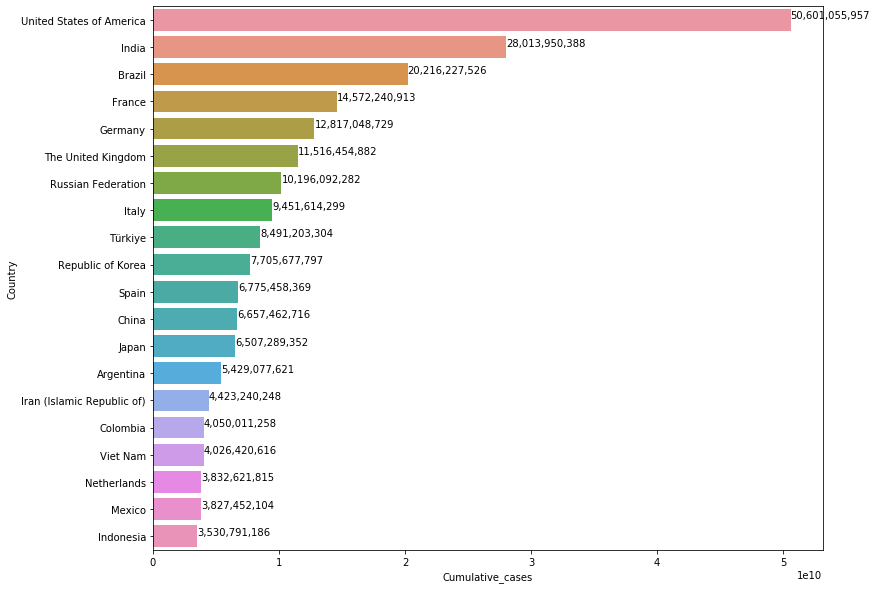

In [10]:
### Find top 20 countries with maximum number of cumulative cases
top_20 = world.sort_values(by=['Cumulative_cases'], ascending=False).head(20)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Cumulative_cases'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Cumulative_cases'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

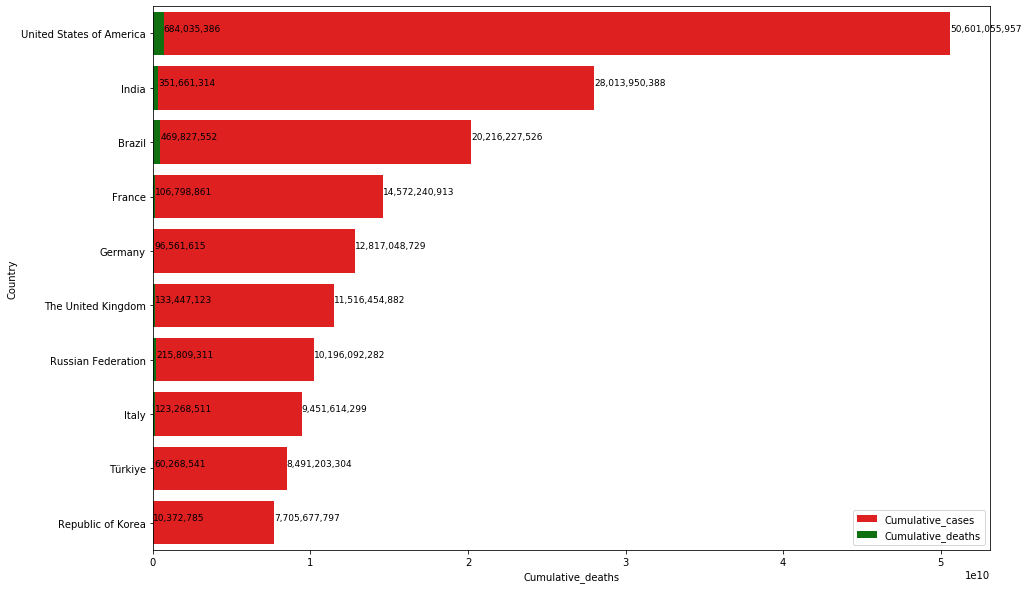

In [11]:
# here we want to visualize the top 10 countries by cumulative cases and how many of those cases were fatal
top_10 = world.sort_values(by=['Cumulative_cases'], ascending=False).head(10)
### Generate a Barplot
plt.figure(figsize=(15,10))
cumulative_cases = sns.barplot(top_10['Cumulative_cases'], top_10['Country'], color = 'red', label='Cumulative_cases')
cumulative_deaths = sns.barplot(top_10['Cumulative_deaths'], top_10['Country'], color = 'green', label='Cumulative_deaths')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_10['Cumulative_cases'],top_10['Country'])):
    cumulative_cases.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Cumulative_deaths'],top_10['Country'])):
    cumulative_deaths.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

In [56]:
#Comparing the Rate of Increase of the Covid-19 for 2 countries with most cases since data has been collected
country1 = 'India'
country1_data = df_globaldata.loc[df_globaldata['Country'] == country1]
country1_cases = country1_data[['Date_reported','Cumulative_cases']]

country2 = 'United States of America'
country2_data = df_globaldata.loc[df_globaldata['Country'] == country2]
country2_cases = country2_data[['Date_reported','Cumulative_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'Date_reported') 
print(datewise_cases.tail())

     Date_reported  Cumulative_cases_x  Cumulative_cases_y
1133    2023-02-09            44683748           101211478
1134    2023-02-10            44683862           101211478
1135    2023-02-11            44683994           101211478
1136    2023-02-12            44684118           101211478
1137    2023-02-13            44684197           101211478


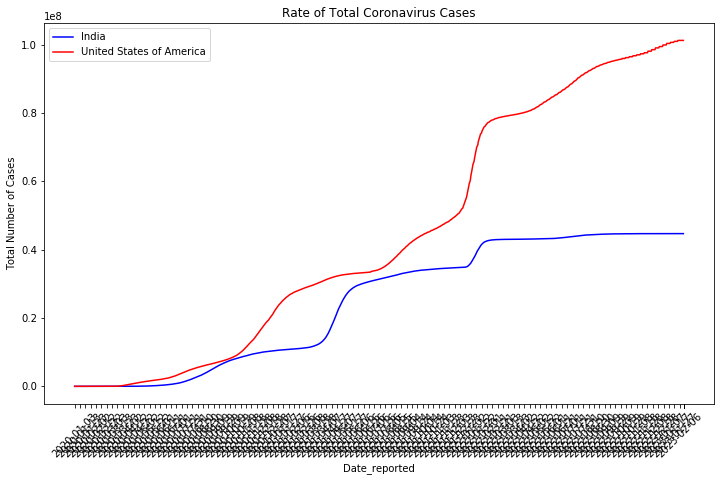

In [57]:
#here we want to visualize the total number of Covid cases for USA and India over the last 2 years, we can see
#exacltly where the spikes in cases seem to be
plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['Date_reported'].values, datewise_cases['Cumulative_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['Date_reported'].values, datewise_cases['Cumulative_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['Date_reported'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date_reported')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

     Date_reported  New_cases_x  New_cases_y
1133    2023-02-09          109            0
1134    2023-02-10          114            0
1135    2023-02-11          132            0
1136    2023-02-12          124            0
1137    2023-02-13           79            0


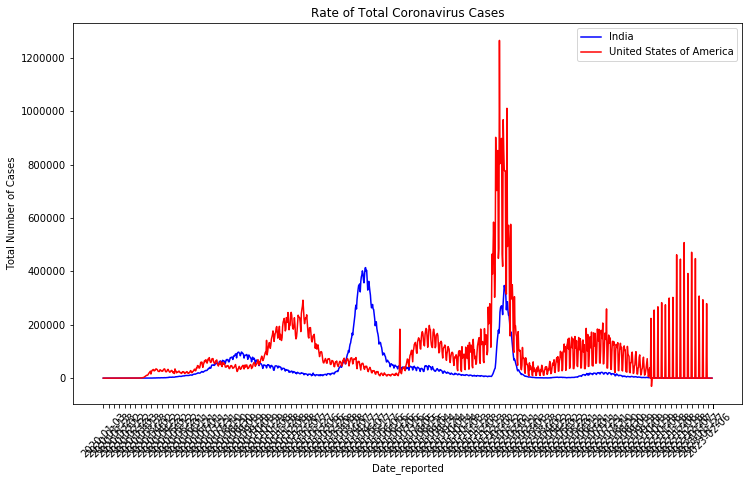

In [14]:
country1 = 'India'
country1_data = df_globaldata.loc[df_globaldata['Country'] == country1]
country1_cases = country1_data[['Date_reported','New_cases']]

country2 = 'United States of America'
country2_data = df_globaldata.loc[df['Country'] == country2]
country2_cases = country2_data[['Date_reported','New_cases']]

datewise_cases = country1_cases.merge(country2_cases, how = 'inner', on = 'Date_reported') 
print(datewise_cases.tail())

plt.figure(figsize=(12, 7))
plt.plot(datewise_cases['Date_reported'].values, datewise_cases['New_cases_x'].values, color='blue', label=country1)
plt.plot(datewise_cases['Date_reported'].values, datewise_cases['New_cases_y'].values, color='red', label=country2)
plt.xticks([datewise_cases['Date_reported'][i] if i%10 == 0 else '' for i in range(len(datewise_cases.index))], rotation = 45)
plt.xlabel('Date_reported')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Total Coronavirus Cases')
plt.legend()
plt.show()

In [15]:
# adding year and month columns to do comparison analysis by date
df_globaldata['Year'] = pd.DatetimeIndex(df_globaldata['Date_reported']).year
df_globaldata['Month'] = pd.DatetimeIndex(df_globaldata['Date_reported']).month

In [18]:
df_globaldata.info()
#df_globaldata['Month'] = df['Month'].astype(str).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269706 entries, 0 to 269705
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      269706 non-null  object 
 1   Country_code       268568 non-null  object 
 2   Country            269706 non-null  object 
 3   WHO_region         269706 non-null  object 
 4   New_cases          269706 non-null  int64  
 5   Cumulative_cases   269706 non-null  int64  
 6   New_deaths         269706 non-null  int64  
 7   Cumulative_deaths  269706 non-null  int64  
 8   Mortality_rate     269706 non-null  float64
 9   Year               269706 non-null  int64  
 10  Month              269706 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 22.6+ MB


In [19]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_globaldata['Month'] = df_globaldata['Month'].apply(lambda x: look_up[x])
df_globaldata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Mortality_rate,Year,Month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,0.0,2020,Jan
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,0.0,2020,Jan
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,0.0,2020,Jan
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,0.0,2020,Jan
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,0.0,2020,Jan


In [20]:
mp = df_globaldata.pivot_table(index = 'Month', columns = 'Year', values = 'New_cases')
mp

Year,2020,2021,2022,2023
Month,,,,
Apr,325.506470,3097.435162,3576.633755,NaN
Aug,1130.310059,2695.169457,3375.743841,NaN
Dec,2594.784130,3366.647475,12375.410644,NaN
Feb,10.990252,1665.492616,8869.010699,669.569620
Jan,1.434308,2689.753505,12228.197359,3114.376752
Jul,958.873282,2151.722200,4156.183204,NaN
Jun,602.398734,1608.130520,2420.081013,NaN
Mar,100.970600,1966.774466,6884.563359,NaN
May,394.010753,2749.701647,2192.102491,NaN


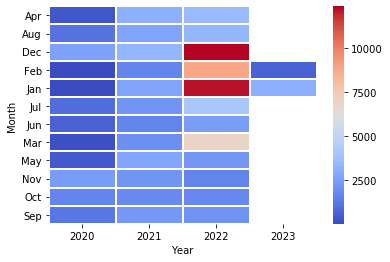

In [21]:
# heatmap of new cases by month and year, as we can see, JAN,FEB,MAR 2022 had the most new cases
sns.heatmap(mp, cmap = 'coolwarm', linecolor = 'white', linewidths = 1)

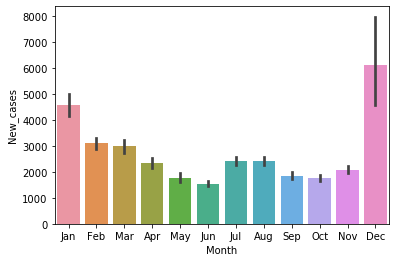

In [22]:
sns.barplot(x = 'Month',y = 'New_cases', data = df_globaldata)

In [23]:
df_globaldata['WHO_region'] = df_globaldata['WHO_region'].replace(['EMRO','EURO','AFRO','WPRO','AMRO','SEARO'], 
                                              ['Eastern Mediterranean','Europe','Africa','Western Pacific',
                                               'Americas','Southeast Asia'])
df_globaldata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Mortality_rate,Year,Month
0,2020-01-03,AF,Afghanistan,Eastern Mediterranean,0,0,0,0,0.0,2020,Jan
1,2020-01-04,AF,Afghanistan,Eastern Mediterranean,0,0,0,0,0.0,2020,Jan
2,2020-01-05,AF,Afghanistan,Eastern Mediterranean,0,0,0,0,0.0,2020,Jan
3,2020-01-06,AF,Afghanistan,Eastern Mediterranean,0,0,0,0,0.0,2020,Jan
4,2020-01-07,AF,Afghanistan,Eastern Mediterranean,0,0,0,0,0.0,2020,Jan


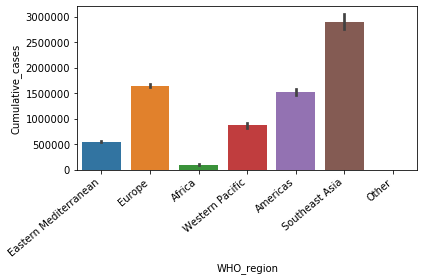

In [24]:
# looking at total number of cumulative cases by WHO region
ax = sns.barplot(x = 'WHO_region',y = 'Cumulative_cases', data = df_globaldata)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

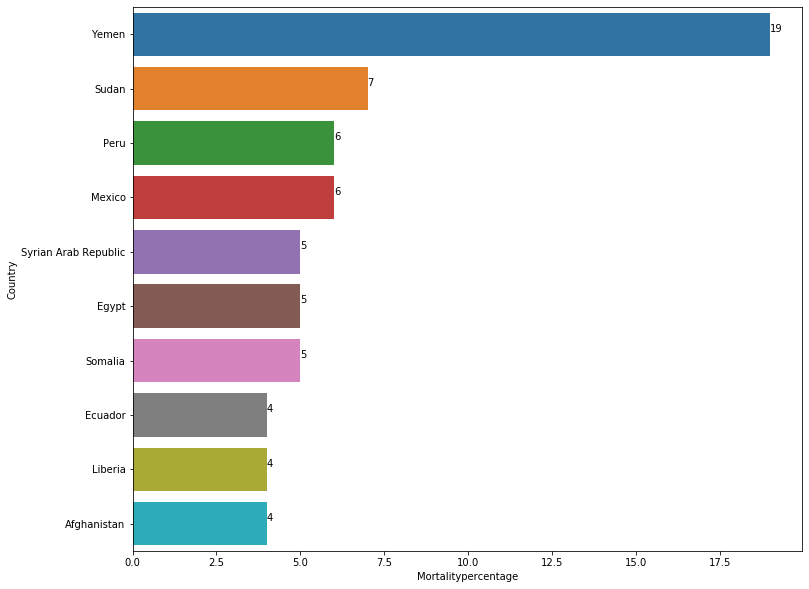

In [85]:
#here we are looking at the countries with the highest mortality rate in the world from Covid
world['Mortalitypercentage'] = (world['Cumulative_deaths']/world['Cumulative_cases'])*100

highestmortalityrate = world.sort_values(by=['Mortalitypercentage'], ascending=False).head(10)
highestmortalityrate['Mortalitypercentage'] = highestmortalityrate['Mortalitypercentage'].astype(int)

plt.figure(figsize=(12,10))
plot = sns.barplot(highestmortalityrate['Mortalitypercentage'], highestmortalityrate['Country'])
for i,(value,name) in enumerate(zip(highestmortalityrate['Mortalitypercentage'],highestmortalityrate['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [100]:
# we want to analyse new cases by date to see spikes, as we can see Jan and Feb of 2022 and 2023 were the worst in 
# terms of new cases
df_newcases = df_globaldata.groupby('Date_reported')[['New_cases','New_deaths']].sum().reset_index()
newcases_top50 = df_newcases.sort_values(by=['New_cases'], ascending=False).head(50)
newcases_top50.iplot(kind='scatter', x='Date_reported', y= 'New_cases', mode= 'markers')

In [25]:
#reading in vaccine database from WHO 
dfvaccine = pd.read_csv(r"C:\Users\Ronak\Downloads\vaccination-data.csv")
df_vaccine = pd.DataFrame(dfvaccine)
df_vaccine.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-01-29,12684950.0,11684678,32.585,30.016,10967235,28.173,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2023-01-15,3047340.0,1344582,105.900,47.245,1273313,44.741,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,385638.0,13.550
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-09-26,111316.0,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-12-18,156242.0,57901,202.200,76.009,53489,70.217,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43020.0,56.474


In [26]:
df_vaccine["TOTAL_VACCINATIONS"] = df_vaccine['TOTAL_VACCINATIONS'].replace(np.nan, 0)
df_vaccine['TOTAL_VACCINATIONS'] = df_vaccine['TOTAL_VACCINATIONS'].astype(int)
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    229 non-null    int32  
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

In [27]:
df_vaccine.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            0
TOTAL_VACCINATIONS_PER100                1
PERSONS_VACCINATED_1PLUS_DOSE_PER100     0
PERSONS_FULLY_VACCINATED                 0
PERSONS_FULLY_VACCINATED_PER100          0
VACCINES_USED                            4
FIRST_VACCINE_DATE                      22
NUMBER_VACCINES_TYPES_USED               4
PERSONS_BOOSTER_ADD_DOSE                22
PERSONS_BOOSTER_ADD_DOSE_PER100         22
dtype: int64

In [28]:
from plotly import __version__
print(__version__)

5.13.0


In [29]:
import cufflinks as cf

In [30]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [31]:
init_notebook_mode(connected = True)

In [32]:
cf.go_offline()

In [33]:
#overview of vaccine data in terms of country
print ('Country with highest number of total vaccinations:',df_vaccine['TOTAL_VACCINATIONS'].max())
df_vaccine.loc[df_vaccine['TOTAL_VACCINATIONS'].idxmax(),['TOTAL_VACCINATIONS','COUNTRY','ISO3','WHO_REGION','DATE_UPDATED']]

Country with highest number of total vaccinations: 661064315


TOTAL_VACCINATIONS                   661064315
COUNTRY               United States of America
ISO3                                       USA
WHO_REGION                                AMRO
DATE_UPDATED                        2023-01-27
Name: 219, dtype: object

In [34]:
print ('Country with least number of total vaccinations:',df_vaccine['TOTAL_VACCINATIONS'].min())
df_vaccine.loc[df_vaccine['TOTAL_VACCINATIONS'].idxmin(),['TOTAL_VACCINATIONS','COUNTRY','ISO3','WHO_REGION','DATE_UPDATED']]

Country with least number of total vaccinations: -2147483648


TOTAL_VACCINATIONS    -2147483648
COUNTRY                     China
ISO3                          CHN
WHO_REGION                   WPRO
DATE_UPDATED           2022-11-29
Name: 43, dtype: object

In [35]:
df_countryxtotalvaccinations = df_vaccine[['COUNTRY','TOTAL_VACCINATIONS','PERSONS_FULLY_VACCINATED']]
df_countryxtotalvaccinations.head()
df_vaccine.iplot(kind='scatter', x='PERSONS_FULLY_VACCINATED', y= 'TOTAL_VACCINATIONS', mode= 'markers')

In [36]:
top20vaxxed = df_vaccine[['COUNTRY','TOTAL_VACCINATIONS']].groupby(['TOTAL_VACCINATIONS'], as_index=False).sum()
top20vaxxed_df = top20vaxxed.sort_values(by=['TOTAL_VACCINATIONS'],ascending=False).head(20)

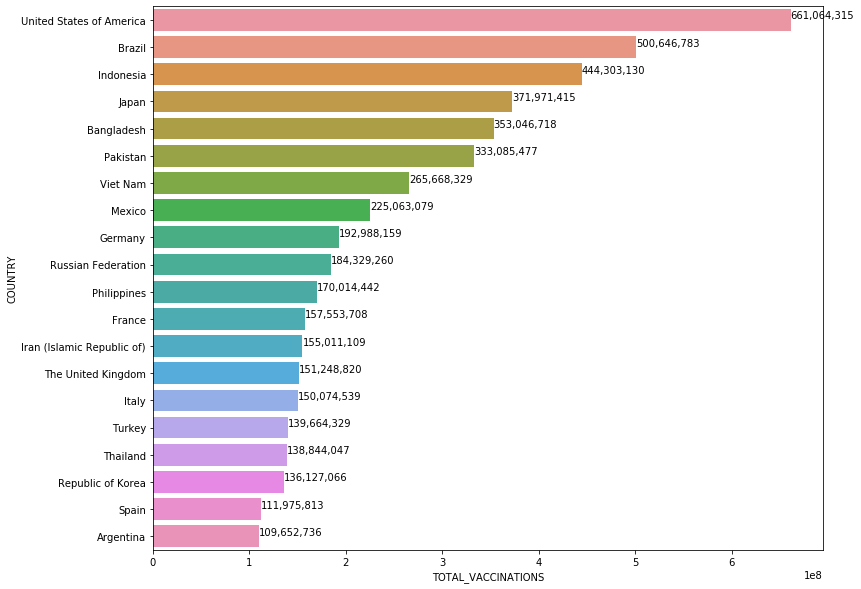

In [37]:
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top20vaxxed_df['TOTAL_VACCINATIONS'], top20vaxxed_df['COUNTRY'])
for i,(value,name) in enumerate(zip(top20vaxxed_df['TOTAL_VACCINATIONS'],top20vaxxed_df['COUNTRY'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

Text(0, 0.5, 'PERSONS_FULLY_VACCINATED_PER100')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


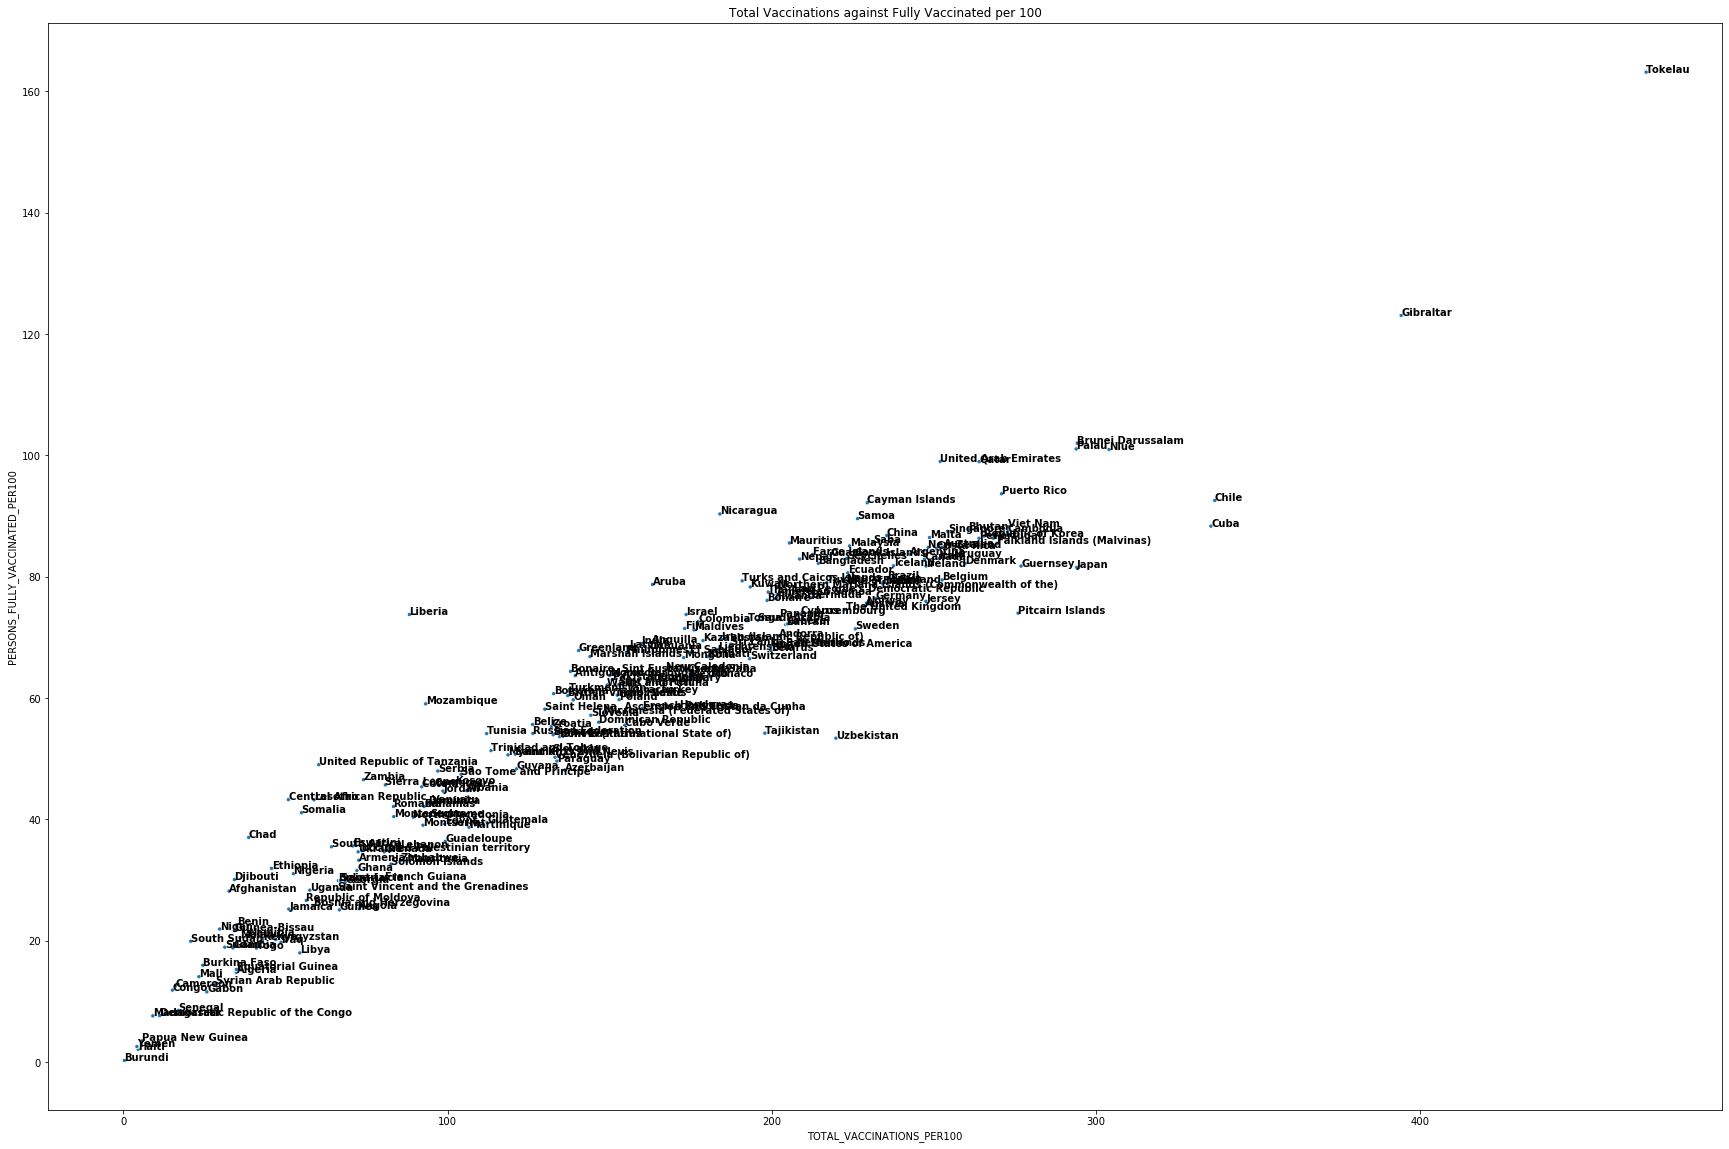

In [38]:
df_vaccine.head()

plt.figure(figsize=(30,20))
p1 = sns.scatterplot(x='TOTAL_VACCINATIONS_PER100', y='PERSONS_FULLY_VACCINATED_PER100', 
                     data=df_vaccine, size = 8, legend=False)  

for line in range(0,df_vaccine.shape[0]):
     p1.text(df_vaccine.TOTAL_VACCINATIONS_PER100[line]+0.05,df_vaccine.PERSONS_FULLY_VACCINATED_PER100[line], 
     df_vaccine.COUNTRY[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

        
plt.title('Total Vaccinations against Fully Vaccinated per 100')
# Set x-axis label
plt.xlabel('TOTAL_VACCINATIONS_PER100')
# Set y-axis label
plt.ylabel('PERSONS_FULLY_VACCINATED_PER100')

In [39]:
df_vaccine['VACCINES_USED'].unique()

array(['AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac',
       'AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac',
       'Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,SII - Covishield,Sinovac - CoronaVac',
       'Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfizer BioNTech - Comirnaty',
       'SII - Covishield',
       'AstraZeneca - Vaxzevria,Pfizer BioNTech - Comirnaty',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,Janssen - Ad26.COV 2-S,Pfizer BioNTech - Comirnaty,SII - Covishield',
       'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Moderna - Spikev

In [40]:
df_vaccine.VACCINES_USED.value_counts()

AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,Sinovac - CoronaVac                     11
AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac    10
AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Novavax-NUVAXOVID,Pfizer BioNTech - Comirnaty                                                                                                                                          8
AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfizer BioNTech - Comirnaty                                                                                                                                                                                 

In [41]:
df_vaxtypebycountry = df_vaccine[["VACCINES_USED", "COUNTRY"]]
df_vaxtypebycountry.head()

,VACCINES_USED,COUNTRY
0,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",Afghanistan
1,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",Albania
2,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",Algeria
3,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",American Samoa
4,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",Andorra


In [42]:
dict_ = {}
for i in df_vaccine.VACCINES_USED.unique():
  dict_[i] = [df_vaxtypebycountry["COUNTRY"][j] for j in df_vaxtypebycountry[df_vaxtypebycountry["VACCINES_USED"]==i].index]

vaccines = {}
for key, value in dict_.items():
  vaccines[key] = set(value)
for i, j in vaccines.items():
  print(f"{i}:>>{j}")

AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac:>>{'Afghanistan', 'Yemen', 'United Arab Emirates', 'Pakistan', 'Syrian Arab Republic', 'Oman', 'Sudan', 'Somalia', 'Bahrain', 'Djibouti'}
AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-Vac,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac:>>{'Albania'}
Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid-Vac,SII - Covishield,Sinovac - CoronaVac:>>{'Algeria'}
Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty:>>{'Palau', 'American Samoa', 'Marshall Islands', 'Guam', 'Liechtenstein', 'Northern Mariana Islands (Commonwealth of the)'}
AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfizer BioNTech - Comirnaty:>>{'Bermuda', 'The United Kingdom', 'Sint Maarten', 'Andorra', 'Israel', 'Curaçao', 'Costa Rica'}
SII - Covishield:>>{'Li

In [127]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    229 non-null    int32  
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

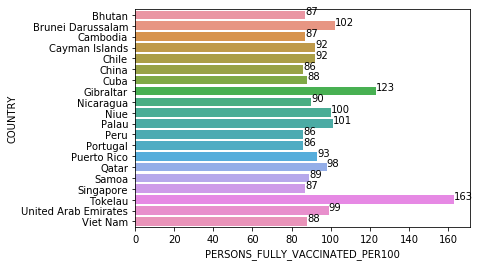

In [150]:
#showing the 20 countries with the highest persons_fully_vaccinated_per100
df_vaccine['PERSONS_FULLY_VACCINATED_PER100'] = df_vaccine['PERSONS_FULLY_VACCINATED_PER100'].astype(int)
lowest_vaccine_rates = df_vaccine.sort_values(by=['PERSONS_FULLY_VACCINATED_PER100'], ascending=False).head(20)
df_lvr = lowest_vaccine_rates.groupby('COUNTRY')[['PERSONS_FULLY_VACCINATED_PER100']].sum().reset_index()
df_lvr
plot = sns.barplot(df_lvr['PERSONS_FULLY_VACCINATED_PER100'], df_lvr['COUNTRY'])
for i,(value,name) in enumerate(zip(df_lvr['PERSONS_FULLY_VACCINATED_PER100'],df_lvr['COUNTRY'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

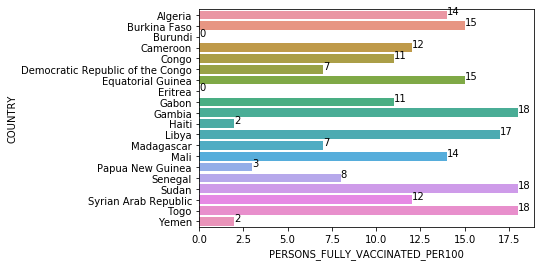

In [149]:
#showing the 20 countries with the lowest persons_fully_vaccinated_per100
df_vaccine['PERSONS_FULLY_VACCINATED_PER100'] = df_vaccine['PERSONS_FULLY_VACCINATED_PER100'].astype(int)
lowest_vaccine_rates = df_vaccine.sort_values(by=['PERSONS_FULLY_VACCINATED_PER100'], ascending=True).head(20)
df_lvr = lowest_vaccine_rates.groupby('COUNTRY')[['PERSONS_FULLY_VACCINATED_PER100']].sum().reset_index()
df_lvr
plot = sns.barplot(df_lvr['PERSONS_FULLY_VACCINATED_PER100'], df_lvr['COUNTRY'])
for i,(value,name) in enumerate(zip(df_lvr['PERSONS_FULLY_VACCINATED_PER100'],df_lvr['COUNTRY'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [123]:
#Comparing how many people are vaccinated against how many people have the booster as well
df_booster = df_vaccine.groupby('COUNTRY')[['PERSONS_FULLY_VACCINATED', 'PERSONS_BOOSTER_ADD_DOSE']].sum().reset_index()
df_booster['PERSONS_BOOSTER_ADD_DOSE'] = df_booster['PERSONS_BOOSTER_ADD_DOSE'].astype(int)
df_booster.iplot(kind='scatter', x='PERSONS_FULLY_VACCINATED', y= 'PERSONS_BOOSTER_ADD_DOSE', mode= 'markers')